In [110]:
import pandas as pd
import pickle
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [167]:
pip install seaborn as sns

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [168]:
import seaborn as sns

In [2]:
july_trip = pd.read_csv('../data/july_trip.csv')
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [3]:
zipcodes= gpd.read_file('../data/zipcodes.geojson')

#Make starTime a datetime format

In [5]:
july_trip['startTime'] =  pd.to_datetime(july_trip['startTime'])

#Create an hour column

In [6]:
july_trip['hour'] = july_trip['startTime'].dt.hour

In [8]:
july_trip.hour.value_counts()

19    13152
17    12732
0     12330
18    12248
21    12092
20    11961
22    11843
23    11358
16    10581
15     7948
1      5291
14     4995
13     3160
12     2037
2      1530
11      917
3       341
4       227
10      157
9        26
Name: hour, dtype: int64

#Group the morning rush hour rides together

In [9]:
rush_hour_morning = july_trip.loc[(july_trip['hour'] == 7)
                                 | (july_trip['hour'] == 8)
                                 | (july_trip['hour'] == 9)]

In [10]:
rush_hour_morning.hour.value_counts()

9    26
Name: hour, dtype: int64

#Group the afternoon rush hour times together

In [130]:
rush_hour_afternoon = july_trip.loc[(july_trip['hour'] == 16) 
                                   |(july_trip['hour'] == 17)
                                   |(july_trip['hour'] == 18)]

In [131]:
rush_hour_afternoon.hour.value_counts()

17    12732
18    12248
16    10581
Name: hour, dtype: int64

#Total rides during afternoon rush is 35561

In [121]:
12732 + 12248 + 10581

35561

#Convert the pubTimeStamp column to datetime

In [14]:
july_trip['pubTimeStamp'] =  pd.to_datetime(july_trip['pubTimeStamp'])

#Pull the weekday name from the pubTimeStamp column

In [15]:
july_trip['weekday'] = july_trip['pubTimeStamp'].dt.day_name()

In [16]:
july_trip.weekday.value_counts()

Saturday     30074
Friday       22224
Sunday       20900
Monday       17080
Thursday     15309
Wednesday    14716
Tuesday      14623
Name: weekday, dtype: int64

#Group the rides by the day of the week

In [17]:
sat_df = july_trip[july_trip['weekday'] == 'Saturday']
sun_df = july_trip[july_trip['weekday'] == 'Sunday']

In [18]:
mon_df = july_trip[july_trip['weekday'] == 'Monday']
tues_df = july_trip[july_trip['weekday'] == 'Tuesday']
wed_df = july_trip[july_trip['weekday'] == 'Wednesday']
thurs_df = july_trip[july_trip['weekday'] == 'Thursday']
fri_df = july_trip[july_trip['weekday'] == 'Friday']

#Plots!

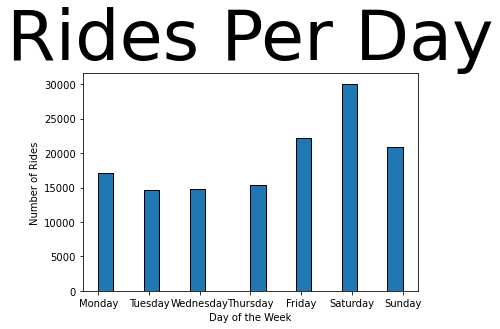

<Figure size 432x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [202]:
#Line plot for days of the week
plt.hist(july_trip.weekday, bins = 20, edgecolor = 'black')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Rides Per Day', fontsize = 70)
plt.figure(figsize=(6, 10))

plt.show()
plt.savefig('rides_per_day.jpg')

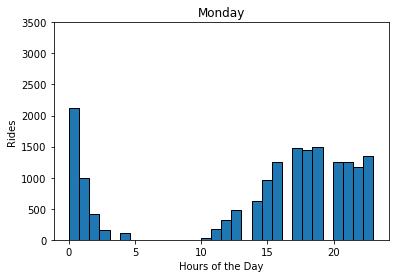

In [140]:
plt.hist(mon_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Monday')
plt.ylim([0, 3500])
plt.show()

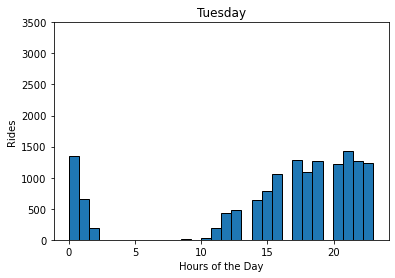

In [141]:
plt.hist(tues_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Tuesday')
plt.ylim([0, 3500])
plt.show()

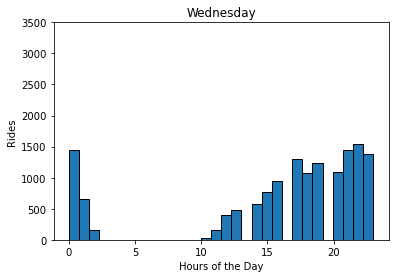

In [142]:
plt.hist(wed_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Wednesday')
plt.ylim([0, 3500])
plt.show()

(0.0, 3500.0)

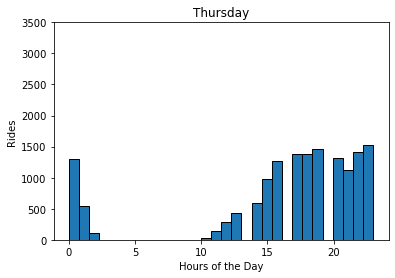

In [143]:
plt.hist(thurs_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Thursday')
plt.ylim([0, 3500])

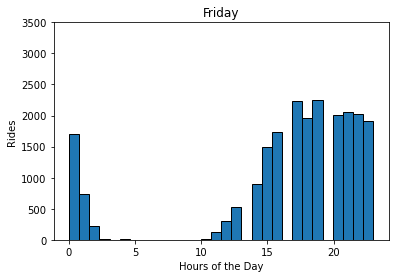

In [144]:
plt.hist(fri_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Friday')
plt.ylim([0, 3500])
plt.show()

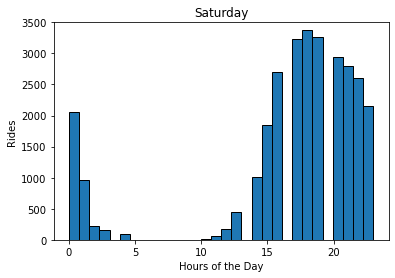

In [145]:
plt.hist(sat_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Saturday')
plt.ylim([0, 3500])
plt.show()

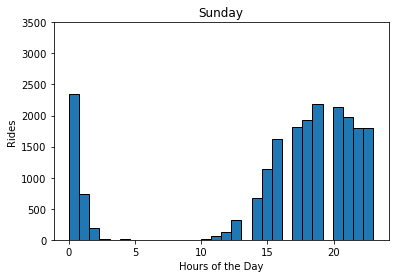

In [146]:
plt.hist(sun_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Sunday')
plt.ylim([0, 3500])
plt.show()

In [50]:
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday
0,2019-07-01 00:02:52.213,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,2021-10-26 00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,0,Monday
1,2019-07-01 00:02:52.213,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,2021-10-26 00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,0,Monday
2,2019-07-01 00:02:52.213,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,2021-10-26 00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,0,Monday
3,2019-07-01 00:02:52.213,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,2021-10-26 00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,0,Monday
4,2019-07-01 00:02:52.213,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,2021-10-26 00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,0,Monday


#Make geometry column for july_trip

In [67]:
july_trip['geometry'] = july_trip.apply(lambda x: Point((x.startLongitude, 
                                                         x.startLatitude)), 
                                        axis=1)
july_trip.head(3)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday,geometry
0,2019-07-01 00:02:52.213,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,2021-10-26 00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,0,Monday,POINT (-86.7516 36.1775)
1,2019-07-01 00:02:52.213,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,2021-10-26 00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,0,Monday,POINT (-86.7711 36.1627)
2,2019-07-01 00:02:52.213,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,2021-10-26 00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,0,Monday,POINT (-86.7713 36.1627)


#Bring in zipcodes df and merge with july_trips to create july_trip_geo

In [68]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [71]:
july_trip_geo = gpd.GeoDataFrame(july_trip, 
                           crs = zipcodes.crs, 
                           geometry = july_trip['geometry'])

In [73]:
rides_by_zip = gpd.sjoin(july_trip_geo, zipcodes, op = 'within')

In [74]:
rides_by_zip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday,geometry,index_right,zip,po_name
0,2019-07-01 00:02:52.213,Bird,BRD5179,PoweredZSHKJ,2.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,...,36.17780,-86.75140,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,0,Monday,POINT (-86.75160 36.17750),46,37206,NASHVILLE
26,2019-07-01 00:12:52.437,Bird,BRD5282,PoweredU1QWL,9.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:04:29.616666,2019-07-01 00:00:00,00:13:11.600000,...,36.17590,-86.76090,"[[36.176038,-86.76081],[36.175959,-86.760837],...",2019-07-02 05:30:19.340000,0,Monday,POINT (-86.76090 36.17600),46,37206,NASHVILLE
118,2019-07-01 00:32:53.757,Bird,BRD5463,Powered3HZZV,4.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:28:50.746666,2019-07-01 00:00:00,00:33:13.110000,...,36.17810,-86.75580,"[[36.178056,-86.755718],[36.177984,-86.75558],...",2019-07-02 05:30:22.107000,0,Monday,POINT (-86.75580 36.17800),46,37206,NASHVILLE
170,2019-07-01 00:43:26.033,Lyft,LFT62,Powered536423,6.95655,1633.85832,2019-07-01 00:00:00,2021-10-26 00:36:28.533333,2019-07-01 00:00:00,00:43:25.926666,...,36.17404,-86.75187,"[[36.1774,-86.74989],[36.17743,-86.74994],[36....",2019-07-02 09:34:38.727000,0,Monday,POINT (-86.74989 36.17740),46,37206,NASHVILLE
211,2019-07-01 00:52:54.660,Bird,BRD5629,PoweredTLSDM,10.00000,0.00000,2019-07-01 00:00:00,2021-10-26 00:42:58.593333,2019-07-01 00:00:00,00:53:08.036666,...,36.17920,-86.74680,"[[36.179298,-86.746625],[36.177447,-86.745683]]",2019-07-02 05:30:23.740000,0,Monday,POINT (-86.74670 36.17920),46,37206,NASHVILLE


In [201]:
rides_by_zip.loc[(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 18) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 17) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37203') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37201') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 7) & (rides_by_zip['weekday'] == 'Friday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Monday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Tuesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Wednesday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Thursday')
                 |(rides_by_zip['zip'] == '37219') & (rides_by_zip['hour'] == 8) & (rides_by_zip['weekday'] == 'Friday')]

           
                

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,hour,weekday,geometry,index_right,zip,po_name
2072,2019-07-01 17:03:38.650,Bird,BRD952,PoweredR1256,0.000000,0.000000,2019-07-01 00:00:00,2021-10-26 17:03:29.650000,2019-07-01 00:00:00,17:03:39.550000,...,36.152800,-86.783600,"[[36.152881,-86.7836]]",2019-07-02 05:31:05.790000,17,Monday,POINT (-86.78360 36.15280),1,37203,NASHVILLE
2082,2019-07-01 17:06:03.097,Lyft,LFT302,Powered302903,5.867833,3589.238960,2019-07-01 00:00:00,2021-10-26 17:00:10.836666,2019-07-01 00:00:00,17:06:02.906666,...,36.159960,-86.773190,"[[36.15513,-86.78216],[36.15521,-86.78215],[36...",2019-07-02 09:35:19.773000,17,Monday,POINT (-86.78216 36.15513),1,37203,NASHVILLE
2087,2019-07-01 17:08:38.703,Bird,BRD983,PoweredML3PC,0.000000,0.000000,2019-07-01 00:00:00,2021-10-26 17:08:18.593333,2019-07-01 00:00:00,17:08:47.106666,...,36.153800,-86.774200,"[[36.15377,-86.77417]]",2019-07-02 05:31:06.087000,17,Monday,POINT (-86.77420 36.15380),1,37203,NASHVILLE
2091,2019-07-01 17:08:38.703,Bird,BRD986,PoweredMGR88,5.000000,656.168000,2019-07-01 00:00:00,2021-10-26 17:04:48.046666,2019-07-01 00:00:00,17:09:24.150000,...,36.159000,-86.782200,"[[36.157791,-86.781725],[36.158969,-86.782047]...",2019-07-02 05:31:06.180000,17,Monday,POINT (-86.78100 36.15760),1,37203,NASHVILLE
2098,2019-07-01 17:13:24.000,Bolt Mobility,BOL00123,Powered-14f91c47-4059-a674-13a6-4a7b2ece2cbd,375.000000,1863.520000,2019-07-01 00:00:00,2021-10-26 17:04:04.000000,2019-07-01 00:00:00,17:10:19,...,36.161669,-86.779102,"[[""36.158594"",""-86.776720""],[""36.158587"",""-86....",2019-07-02 06:17:11.383000,17,Monday,POINT (-86.77672 36.15859),1,37203,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133493,2019-07-31 19:37:18.310,Lyft,LFT459,Powered147794,49.291467,23494.095240,2019-07-31 00:00:00,2021-10-26 18:48:00.670000,2019-07-31 00:00:00,19:37:18.160000,...,36.149110,-86.811750,"[[36.16772,-86.7832],[36.16776,-86.78321],[36....",2019-08-01 10:35:24.400000,18,Wednesday,POINT (-86.78320 36.16772),15,37219,NASHVILLE
133548,2019-07-31 19:59:28.170,Lime,LIM823542,Powered32W3O4U3TKJRM,46.000000,1867.447598,2019-07-31 00:00:00,2021-10-26 18:05:07.000000,2019-07-31 00:00:00,18:51:36,...,36.164647,-86.779570,"[[36.16351,-86.77936],[36.16337,-86.7794799999...",2019-08-01 09:31:41.490000,18,Wednesday,POINT (-86.77942 36.16396),15,37219,NASHVILLE
133603,2019-07-31 19:59:28.443,Lime,LIM823596,PoweredTJILFG5KOQ7KN,40.000000,18432.729631,2019-07-31 00:00:00,2021-10-26 18:43:39.000000,2019-07-31 00:00:00,19:23:02,...,36.133433,-86.778529,"[[36.16236,-86.77925],[36.16304,-86.77863],[36...",2019-08-01 09:31:45.570000,18,Wednesday,POINT (-86.77919 36.16186),15,37219,NASHVILLE
133607,2019-07-31 19:59:28.473,Lime,LIM823600,PoweredSQWMJWTIGM6DS,41.000000,0.000000,2019-07-31 00:00:00,2021-10-26 18:43:21.000000,2019-07-31 00:00:00,19:24:06,...,36.133462,-86.778418,"[[36.16204,-86.7792]]",2019-08-01 09:31:45.690000,18,Wednesday,POINT (-86.77920 36.16204),15,37219,NASHVILLE


#In the top 3 zipcodes for scooter counts, 11244 rides were taken during rush hour out of 103,154 total rides.

In [200]:
rides_by_zip['zip'].value_counts()

37203    65089
37201    26237
37219    11828
37212     6572
37208     5719
37213     4567
37206     4275
37204     3692
37210     3237
37240     1680
37207      588
37232      571
37209      524
37228       92
37216       62
37205       49
37246       46
37215       34
37211       30
37013       14
37217        5
37218        3
37221        3
37214        3
37220        2
37115        2
Name: zip, dtype: int64

C:\Users\tomle\AppData\Local\Temp/ipykernel_10584/3112590286.py:40: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


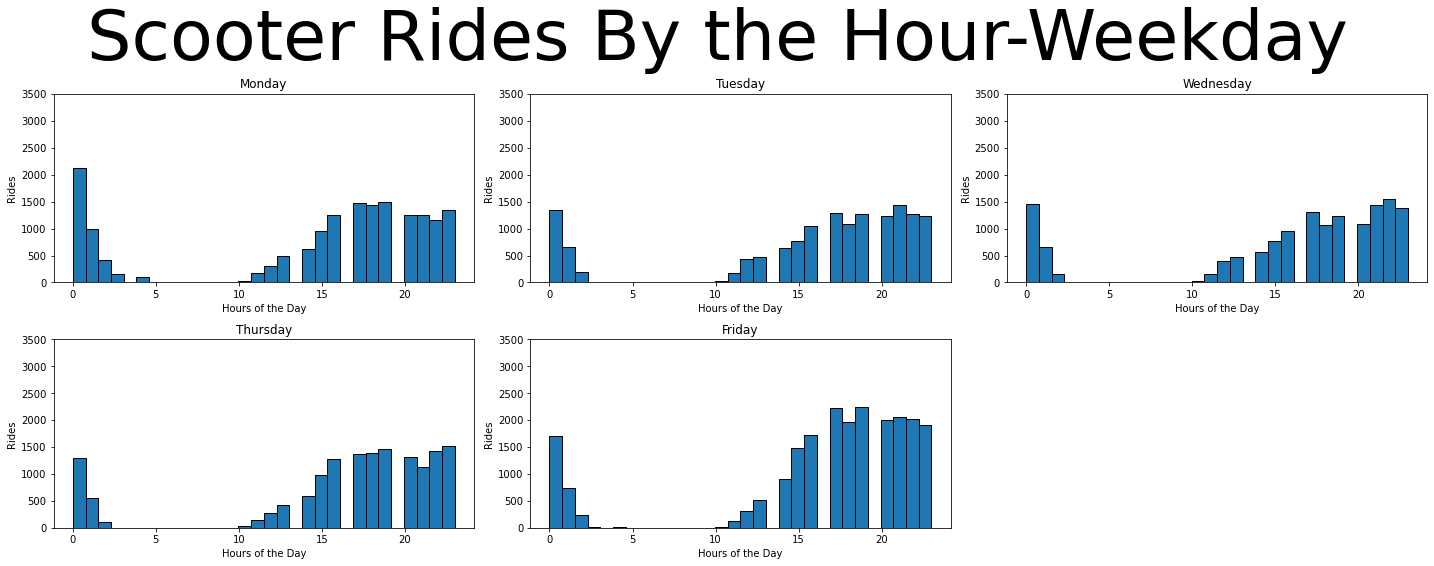

In [188]:
plt.figure(figsize=(20,11))
plt.suptitle('Scooter Rides By the Hour-Weekday', fontsize = 70)


plt.subplot(3,3,1)
plt.hist(mon_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Monday')
plt.ylim([0, 3500])

plt.subplot(3,3,2)
plt.hist(tues_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Tuesday')
plt.ylim([0, 3500])

plt.subplot(3,3,3)
plt.hist(wed_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Wednesday')
plt.ylim([0, 3500])

plt.subplot(3,3,4)
plt.hist(thurs_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Thursday')
plt.ylim([0, 3500])

plt.subplot(3,3,5)
plt.hist(fri_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Friday')
plt.ylim([0, 3500])

plt.tight_layout(1)




C:\Users\tomle\AppData\Local\Temp/ipykernel_10584/1242170153.py:19: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


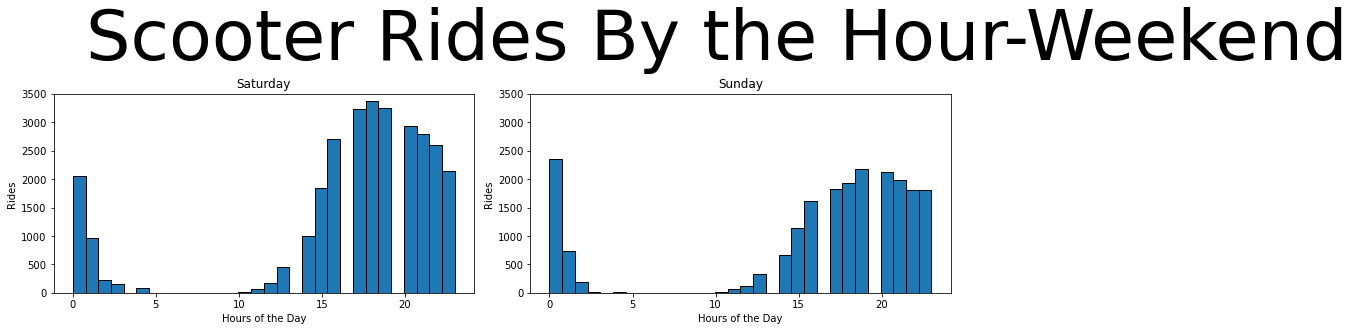

In [189]:
plt.figure(figsize=(20,11))
plt.suptitle('Scooter Rides By the Hour-Weekend', fontsize = 70)


plt.subplot(3,3,1)
plt.hist(sat_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Saturday')
plt.ylim([0, 3500])

plt.subplot(3,3,2)
plt.hist(sun_df.hour, bins = 30, edgecolor = 'black')
plt.xlabel('Hours of the Day')
plt.ylabel('Rides')
plt.title('Sunday')
plt.ylim([0, 3500])

plt.tight_layout(1)
